In [1]:
import sympy as sym
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# **Sumatoria, Multiplicatoria**

In [2]:
x = [1,3,4,1,6]

np.sum(x), np.prod(x), np.cumsum(x)

(15, 72, array([ 1,  4,  8,  9, 15]))

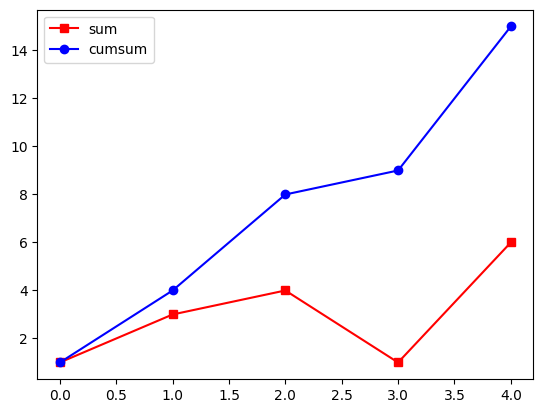

In [3]:
plt.plot(x, "rs-", label="sum");
plt.plot(np.cumsum(x), "bo-",label="cumsum");
plt.legend();



Summation = $$ \begin{equation*}\sum_{i=1}^{n} a_{i}\end{equation*}   =   a_{1} + a_{2} + a_{3} + ... + a_{n}$$

Product = $$ \begin{equation*}\prod_{i=1}^{n} a_{i}\end{equation*}   =   a_{1} \times a_{2} \times a_{3}  \times ...\times  a_{n}$$

In [4]:
a = np.array([1,2,3,4,5])

print(np.sum(a) / np.sum(a**2) == 1 / np.sum(a))

print(np.prod(a) / np.prod(a**2) == 1 / np.prod(a))

False
True


# **Differences (discrete derivative)**

In [5]:
x = [1,4,5,-3]

np.diff(x)

array([ 3,  1, -8])

In [6]:
v = np.arange(1,11, 2)

print(v)

print(np.diff(v))  # this is diference between n+1 and n.
print(np.diff(v,2))  # this is difference of the difference.

[1 3 5 7 9]
[2 2 2 2]
[0 0 0]


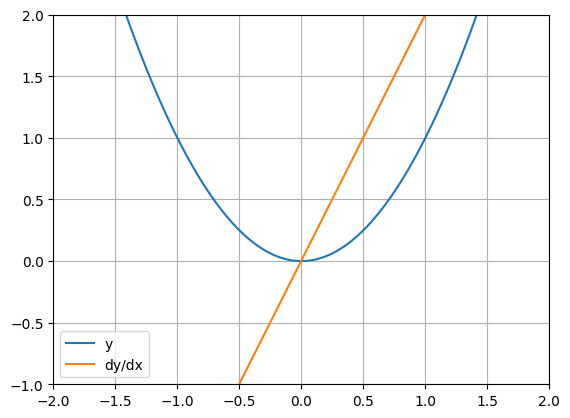

In [7]:
#x,y = sym.symbols("x,y")

x = np.linspace(-2,2,1000)
y = x**2

dx = np.diff(x)
dy = np.diff(y)
#dy = 2*x

plt.plot(x,y, label="y");
plt.plot(x[:-1], dy/dx, label="dy/dx")
plt.axis([-2,2,-1,2])
plt.grid()
plt.legend();

# **Roots of polynomials**

An n-degree polynomial has n-roots.

In [8]:
#Numpy way.

## the polybnomial:
# 3x^2 + 2x - 1

# define the coefficients
coefs = [3,2,-1]  # this is the correct order of coefficients -> higher exponent to lower.
roots = np.roots(coefs)
print(f" The roots of the equation are {roots}")

 The roots of the equation are [-1.          0.33333333]


In [9]:
#Sympy way

x,y = sym.symbols("x,y")

pn = 3*x**2 + 2*x - 1

for i in roots:
    display(Math("\\text{At x }=%g, \\quad %s = %g" %(i,sym.latex(pn),pn.subs({x:i}))))

print(sym.solve(pn,x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[-1, 1/3]


In [10]:
x = sym.symbols("x")

for n in range(0,10):
    
    p = 2*x**n + 2
    
    print(f"A degree {n} Polynomial has {len(sym.solve(p))} roots")

A degree 0 Polynomial has 0 roots
A degree 1 Polynomial has 1 roots
A degree 2 Polynomial has 2 roots
A degree 3 Polynomial has 3 roots
A degree 4 Polynomial has 4 roots
A degree 5 Polynomial has 5 roots
A degree 6 Polynomial has 6 roots
A degree 7 Polynomial has 7 roots
A degree 8 Polynomial has 8 roots
A degree 9 Polynomial has 9 roots


# **Quadratic equation**

In [11]:
def solve_quadratic(**kwargs):#*args,
    
    a = kwargs["a"]
    b = kwargs["b"]
    c = kwargs["c"]
    
    solution_1 = (-b + np.lib.scimath.sqrt(b**2-4*a*c)) / (2*a)  #scimat.sqrt allows me to handle negative sqrt.
    solution_2 = (-b - np.lib.scimath.sqrt(b**2-4*a*c)) / (2*a)
    
    return solution_1, solution_2 

In [12]:
solve_quadratic(a=2,b=7,c=5)[0]

-1.0

In [13]:
a = 1
b = np.arange(-5,6)
c = np.arange(-2,11)

M = np.zeros((len(b),len(c)))

for n, bi in enumerate(b):
    for num, ci in enumerate(c):
        M[n,num] = solve_quadratic(a=a,b=bi, c=ci)[0]
        
        

C:\Users\56976\AppData\Local\Temp\ipykernel_12676\4258062272.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  M[n,num] = solve_quadratic(a=a,b=bi, c=ci)[0]


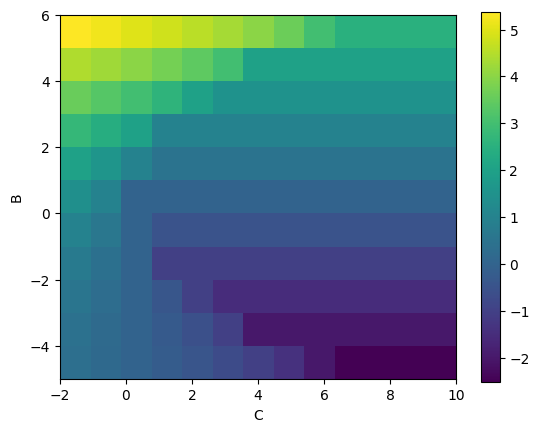

In [14]:
plt.imshow(M, extent=[-2,10,-5,6])
plt.xlabel("C")
plt.ylabel("B");
plt.colorbar();

# **Complex Numbers**

$$ z = a \times bi $$

z : Complex number<br>
a : Real part<br>
b : Imaginary part<br>
i : Imaginary operator<br>
<br>

**Adding and substracting complex numbers**

$$ z = a \times bi $$
$$ w = c \times di $$

$$z + w = (a + c) \times (b+d)i $$
$$z - w = (a - c) \times (b-d)i $$

In [15]:
# Python built in imaginary operator is j, j = sqrt(-1)

print(1j)
print(np.sqrt(-1, dtype="complex"))
print(np.sqrt(-4, dtype="complex"))
display(sym.I*2)

1j
1j
2j


2*I

In [16]:
real_part = 4
imag_part = -5

cn1 = complex(real_part, imag_part)
cn2 = real_part + 1j*imag_part

print(type(cn1))
print(type(cn2))

<class 'complex'>
<class 'complex'>


In [17]:
z1 = complex(4,6)
z2 = complex(3,2)

z = z1 + z2

# Getting real part and imaginary separated.
np.real(z) , np.imag(z)


(7.0, 8.0)

In [18]:
w = complex(2,4)
z = complex(5,6)

w + z == complex(np.real(w) + np.real(z),  np.imag(w) + np.imag(z))

True

**Multiply Complex numbers**

$$ z = a \times bi $$
$$ w = c \times di $$


$$z \times w = (a + bi) \times (c + di) = ac + adi + cbi + bdi^2 = ac + adi + abi - bd$$

**Complex Conjugate**

$$ \text{complex number } z = a + bi$$
$$ \text{complex conjugate } z* = a - bi$$


**Multiplication with complex conjugate**

$$ z \times z* = (a + bi) \times (a - bi) = a^2 - abi + abi - (bi)^2 = a^2 + b^2$$

In [19]:
# create complex numbers
z1 = complex(4,5)
z2 = complex(6,-2)

# multiplication the "manual" way, never do this.
w = np.real(z1)*np.real(z2) + np.real(z1)*np.imag(z2)*1j + np.imag(z1)*np.real(z2)*1j + np.imag(z1)*np.imag(z2)*1j*1j

print(w)
sym.sympify(z1*z2)

(34+22j)


34.0 + 22.0*I

In [20]:
z1 , np.conj(z1),  np.real(z1 * np.conj(z1))

((4+5j), (4-5j), 41.0)

**Division with complex numbers, using conjugate trick**<br>

$$ \frac{4 + 2i}{2 - 3i} = \frac{(4+2i)(2+3i)}{(2-3i)(2+3i)} = \frac{8+ 12i + 4i - 6}{2^2 + 3^2} = \frac{2+16i}{13}$$

In [21]:
z = complex(4,2)


display(Math("\\frac{%s}{2} = %s" %(z,z/2)))


<IPython.core.display.Math object>

In [22]:
num = complex(4,2)
den = complex(2,-3)

display(Math("\\frac{%s}{%s} = \\frac{%s%s}{%s%s} = \\frac{8+ 12j + 4j - 6}{2^2 + 3^2} = \\frac{2+16j}{13}" %(
                num,den, num, np.conj(den), den, np.conj(den))))

<IPython.core.display.Math object>

In [23]:
z , w = sym.symbols("z,w")

expr = ((z-1)*(z*w+w)/ (w*z - w)) * ((w-1)*(1-w)/ (-z*w**2 - w**2 +2*w*z + 2*w -z - 1))

display(expr)

expr = sym.simplify(expr.subs({z:complex(4,2), w:complex(3,5)}))
display(expr)


(1 - w)*(w - 1)*(z - 1)*(w*z + w)/((w*z - w)*(-w**2*z - w**2 + 2*w*z + 2*w - z - 1))

1.00000000000000

**Graphing Complex numbers**

In [24]:
z = complex(2,3)

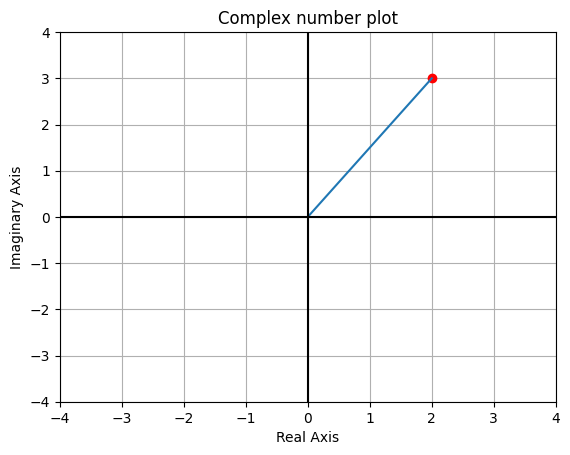

In [25]:
import seaborn as sns

#sns.scatterplot(x = [np.real(z)], y = [np.imag(z)], color="red");
plt.plot(np.real(z),np.imag(z), "ro")
sns.lineplot(x=[0,np.real(z)], y = [0, np.imag(z)])
plt.xlabel("Real Axis");
plt.ylabel("Imaginary Axis");
plt.title("Complex number plot")
plt.grid(visible=True)
plt.axis([-4,4,-4,4]);
plt.axhline(0, color='black')
plt.axvline(0, color='black');

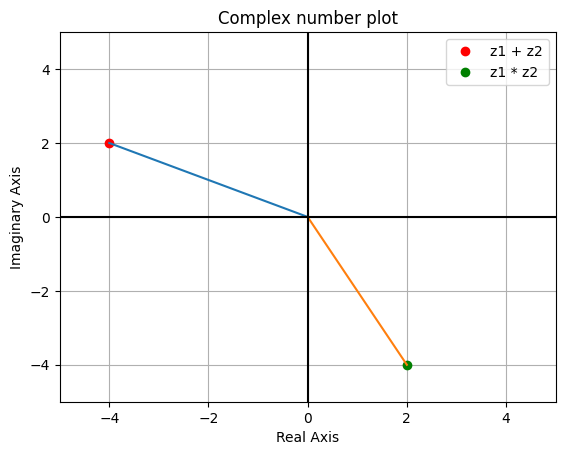

In [26]:
z1 = complex(-3,1)
z2 = complex(-1,1)

z1_sum_z2 = z1 + z2
z1_prod_z2 = z1 * z2


plt.plot(np.real(z1_sum_z2),np.imag(z1_sum_z2), "ro", label="z1 + z2")
sns.lineplot(x=[0,np.real(z1_sum_z2)], y = [0, np.imag(z1_sum_z2)])
plt.plot(np.real(z1_prod_z2),np.imag(z1_prod_z2), "go", label="z1 * z2")
sns.lineplot(x=[0,np.real(z1_prod_z2)], y = [0, np.imag(z1_prod_z2)])
plt.xlabel("Real Axis");
plt.ylabel("Imaginary Axis");
plt.title("Complex number plot")
plt.grid(visible=True)
plt.axis([-5,5,-5,5]);
plt.axhline(0, color='black')
plt.axvline(0, color='black');

**Plotting quadratic equation including complex numbers**

In [27]:
a = 1
b = np.arange(-5,6)
c = np.arange(-2,11)

M = np.zeros((len(b),len(c)), dtype=complex)   #explicitly tell numbers that we want matrix to handle complex

for n, bi in enumerate(b):
    for num, ci in enumerate(c):
        M[n,num] = solve_quadratic(a=a,b=bi, c=ci)[0]

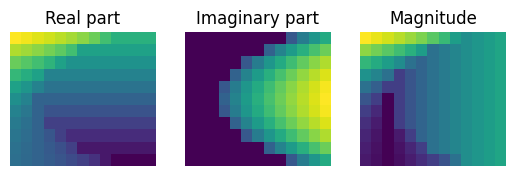

In [28]:
plt.subplot(1,3,1)
plt.imshow(np.real(M), extent=[-2,10,-5,6])
plt.xlabel("C")
plt.ylabel("B")
plt.title("Real part");
plt.axis("off");

plt.subplot(1,3,2)
plt.imshow(np.imag(M), extent=[-2,10,-5,6])
plt.xlabel("C")
plt.ylabel("B")
plt.title("Imaginary part");
plt.axis("off");

plt.subplot(1,3,3)
plt.imshow(np.absolute(M), extent=[-2,10,-5,6])
plt.xlabel("C")
plt.ylabel("B")
plt.title("Magnitude");
plt.axis("off");
#plt.colorbar();

# **The unit circle**

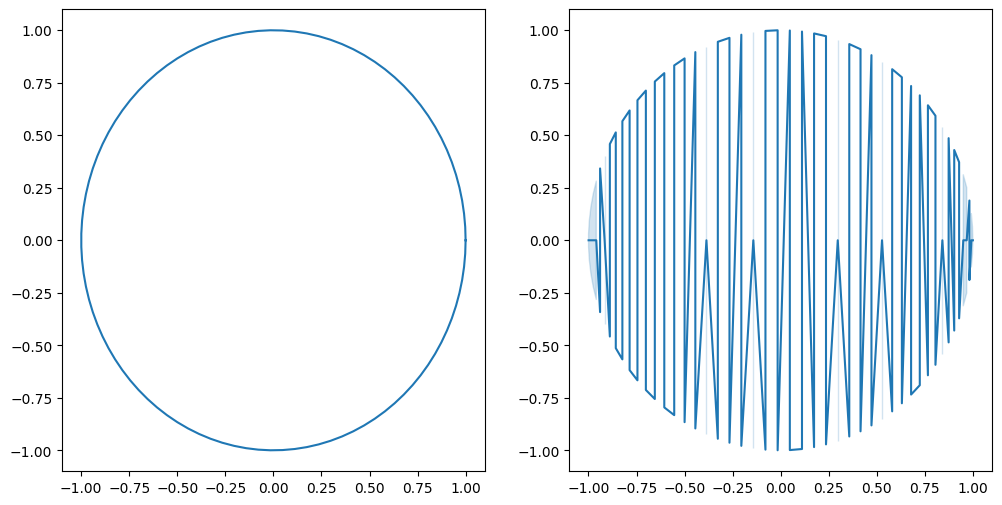

In [29]:
plt.figure(figsize=(12,6),dpi=100);

x = np.linspace(0, 2 * np.pi, 100)

plt.subplot(1,2,1)
sns.lineplot(x = np.cos(x), y=np.sin(x), estimator=None, sort=None); 

plt.subplot(1,2,2)
sns.lineplot(x = np.cos(x), y=np.sin(x)); #seaborn default estimator "mean" and "sort" messing up

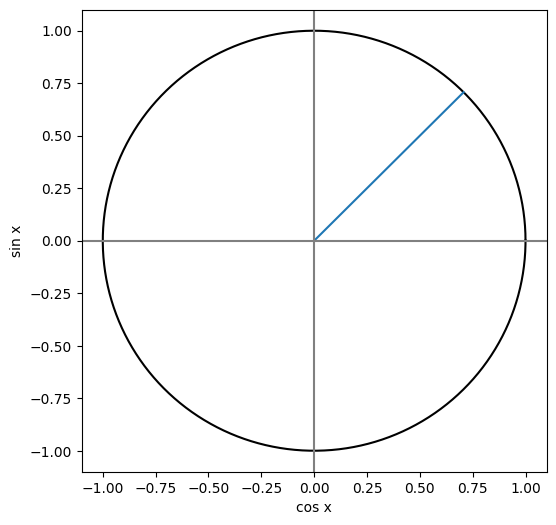

In [30]:
plt.figure(figsize=(6,6),dpi=100);

x = np.linspace(0, 2*np.pi, 360)
angle = np.pi/4

plt.plot(np.cos(x), np.sin(x), "k");
plt.plot([0, np.cos(angle)], [0, np.sin(angle)])
plt.xlabel("cos x")
plt.ylabel("sin x");
plt.axhline(0, color='gray');
plt.axvline(0, color='gray');

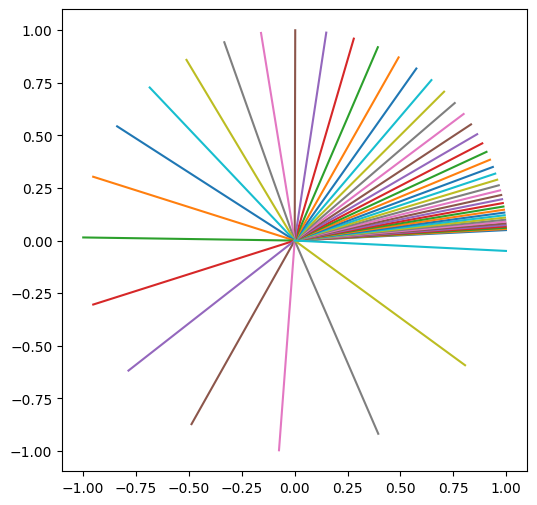

In [31]:
x = np.linspace(-3,1.83, 50)
k = np.exp(x)


plt.figure(figsize=(6,6),dpi=100)

for n in k:
    
    xi = np.cos(n)
    yi = np.sin(n)
    
    plt.plot([0,xi], [0, yi])
    
    

# **Natural Exponents and logarithms**

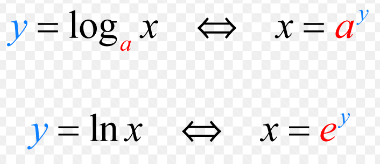

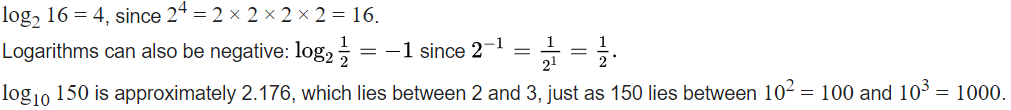

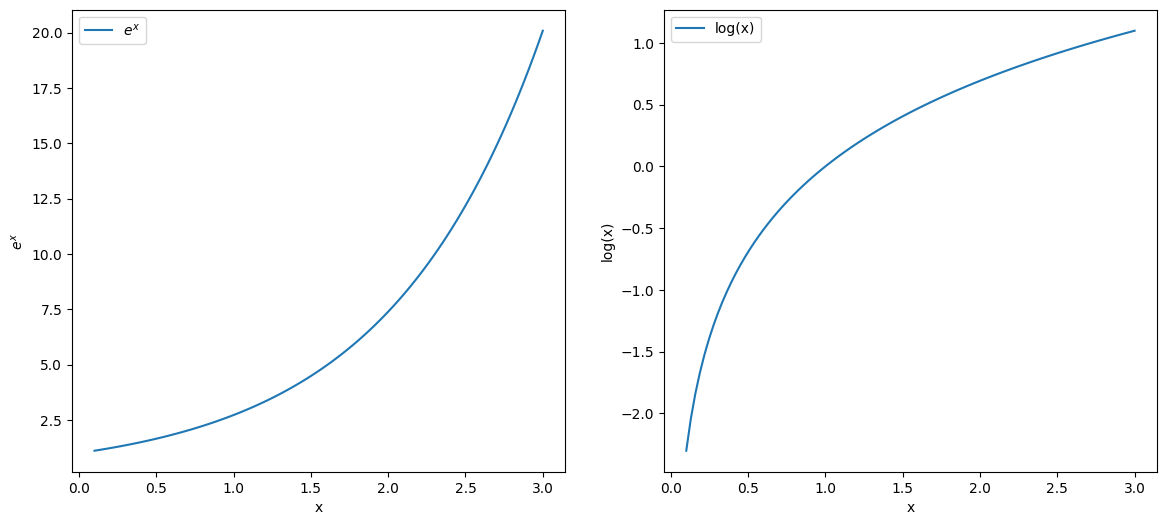

In [32]:
x = np.linspace(0.1,3,100)

y_exp = np.exp(x)
y_log = np.log(x) #natural log


plt.figure(figsize=(14,6), dpi=100)
plt.subplot(1,2,1)
plt.plot(x,y_exp, label="$ e^x $");
plt.xlabel("x")
plt.ylabel("$ e^x $")
plt.legend();

plt.subplot(1,2,2)
plt.plot(x,y_log, label="log(x)");
plt.xlabel("x")
plt.ylabel("log(x)");
plt.legend();


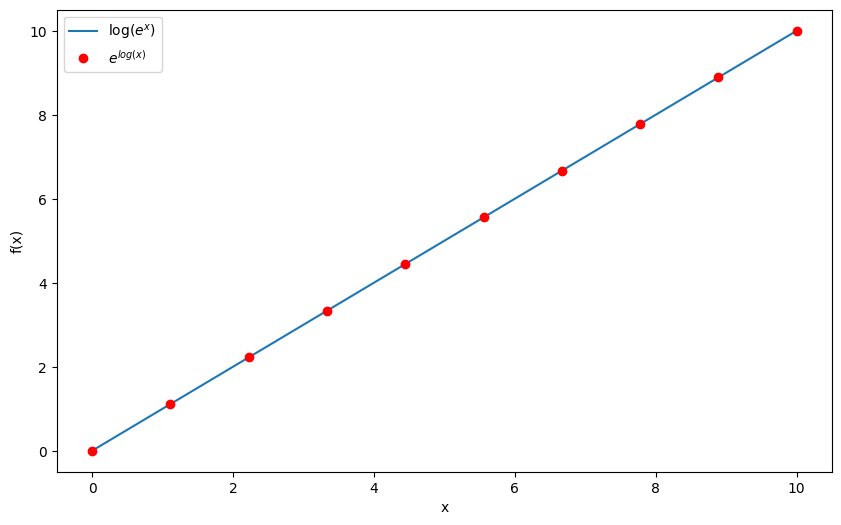

In [33]:
x = np.linspace(0.0001, 10, 10)

y1 = np.log(np.exp(x))
y2 = np.exp(np.log(x))


plt.figure(figsize=(10,6))
plt.plot(x,y1, label="$\\log(e^x)$")
plt.plot(x,y2, "ro", label="$e^{log(x)}$");
plt.xlabel("x")
plt.ylabel("f(x)");
plt.legend();




# **A gaussian Curve**

$$ y = e^\frac {-4ln(2)t^2} {h^2} $$

$$ y = exp (\frac{-4ln(2)t^2}{h^2})$$

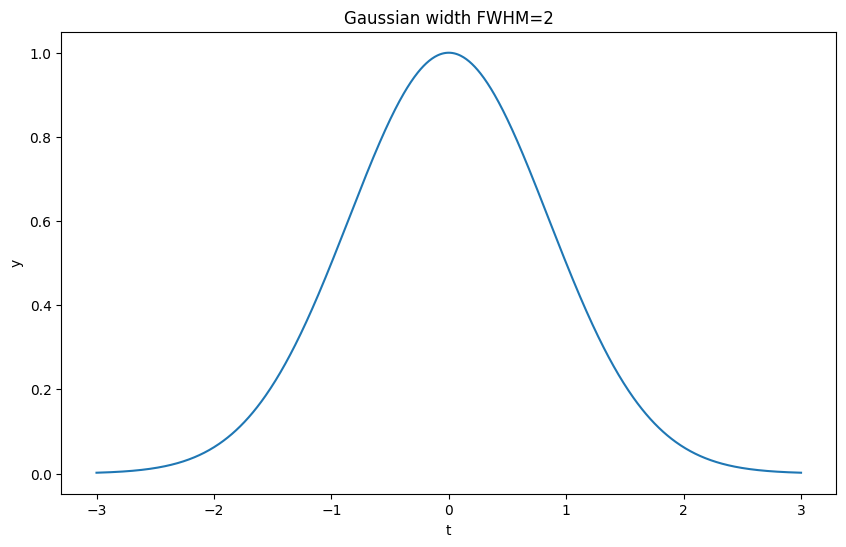

In [34]:
t = np.linspace(-3,3,1001)

h = 2  # full width at half maximum (FWHM)

y = np.exp(-4*np.log(2)*t**2/(h**2))


plt.figure(figsize=(10,6), dpi=100)

plt.plot(t,y);
plt.xlabel("t")
plt.ylabel("y");
plt.title(f"Gaussian width FWHM={h}");

In [35]:
yval2find =  0.5
h = 1


tvals = h*np.sqrt(np.log(yval2find)/(-4*np.log(2)))

print(tvals, -tvals)

0.5 -0.5


In [36]:
t = np.linspace(-3,3,100)

h = np.linspace(0.0001,1,100)  # full width at half maximum (FWHM)

M = np.zeros((len(t),len(h)))

for n, ti in enumerate(t):
    for num, hi in enumerate(h):
        M[n,num] = np.exp(-4*np.log(2)*ti**2/(hi**2))

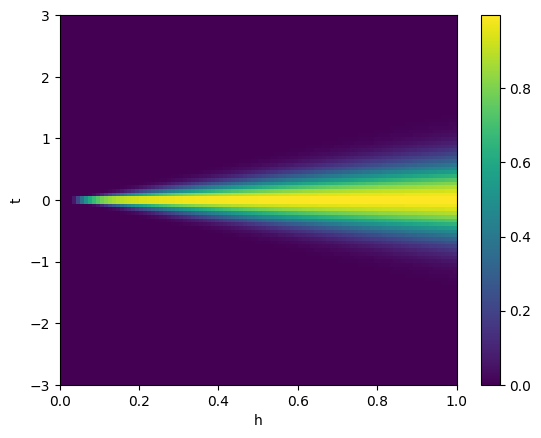

In [37]:
plt.imshow(M,aspect="auto", origin="lower", extent=[0,1,-3,3]);
plt.xlabel("h")
plt.ylabel("t");
plt.colorbar();

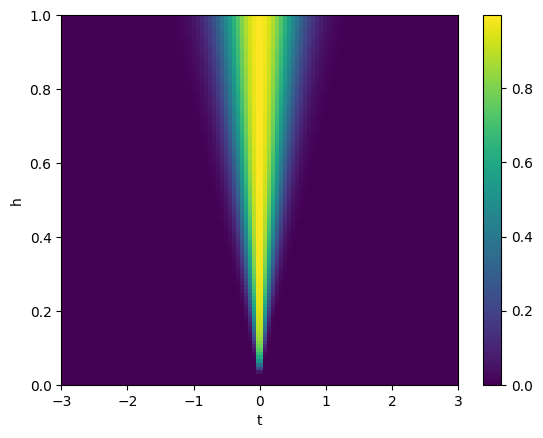

In [38]:
plt.imshow(M.T,aspect="auto", origin="lower", extent=[-3,3,0,1]);
plt.xlabel("t")
plt.ylabel("h");
plt.colorbar();

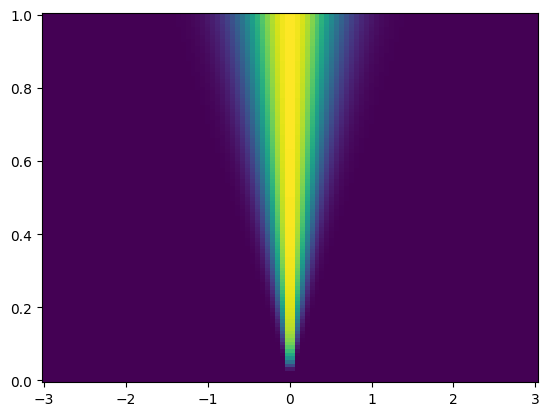

In [39]:
plt.pcolormesh(t,h , M.T);

# **Roots of unity**

$$ \large z^n = 1, \ z \in \mathbb{C} $$

$$ \huge z = e^\frac{2\pi ik}{n} $$

$$ \large k = 0,1,..., n -1 $$

In [40]:
n = 5

for k in range(0,n):
    z = np.exp(2*np.pi*1j*k/n)
    print(np.real(z**n))

1.0
0.9999999999999999
1.0
0.9999999999999997
1.0


In [41]:
n = 3

for k in range(0,n):
    z = sym.exp(2*sym.pi*sym.I*k/n)
    display(Math("\\large (%s)^%s \\Rightarrow %s" %(sym.latex(z),n,sym.latex(z**n))))
    #print(z**n)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

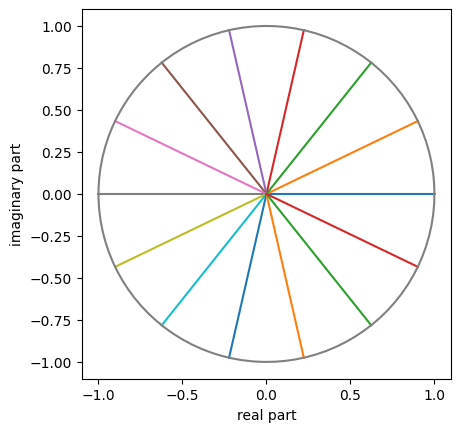

In [42]:
n = 14

for k in range(0,n):
    z = np.exp(2*np.pi*1j*k/n)
    plt.plot([0,np.real(z)], [0,np.imag(z)])
    
x = np.linspace(0,2*np.pi,100)    
plt.plot(np.cos(x), np.sin(x), color="grey")
plt.xlabel("real part")
plt.ylabel("imaginary part")
plt.axis("square");

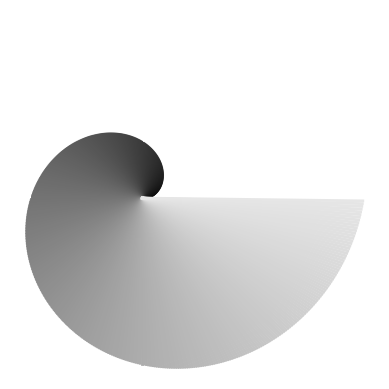

In [43]:
n = 500

color_pal = np.linspace(0,.9,n)

for k in range(0,n):
    z = k * np.exp(2*np.pi*1j*k/n) # + k/n
    plt.plot([0,np.real(z)], [0,np.imag(z)], linewidth=2, color=[color_pal[k],color_pal[k],color_pal[k]])
    
x = np.linspace(0,2*np.pi,100)    
#plt.plot(np.cos(x), np.sin(x), color="grey")
plt.xlabel("real part")
plt.ylabel("imaginary part")
plt.axis("square");
plt.axis("off");

# **Linear are log-spaced numbers**

- **The difference between "log-spaced" and "linear-spaced" numbers.**

- **why linear functions are good local aprroximations of nonlinear functions**

Linear: 1, 2, 3 ,4 ,5<br>
log-space: 1, 1.5, 2.2, 3.3, 5

In [44]:
np.linspace(1,2,10)

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

In [45]:
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [46]:
np.logspace(np.log10(1), np.log10(2), 10 )

array([1.        , 1.08005974, 1.16652904, 1.25992105, 1.36079   ,
       1.46973449, 1.58740105, 1.71448797, 1.85174942, 2.        ])

In [47]:
a = np.log10(1)
b = np.log10(2)

np.logspace(a,b,10)

array([1.        , 1.08005974, 1.16652904, 1.25992105, 1.36079   ,
       1.46973449, 1.58740105, 1.71448797, 1.85174942, 2.        ])

In [48]:
linear = np.linspace(2,100,100)

a = np.log10(2)
b = np.log10(100)
log_space = np.logspace(a,b,100)

Linear functions are good aproximations of non-linear functions as distances get very small.

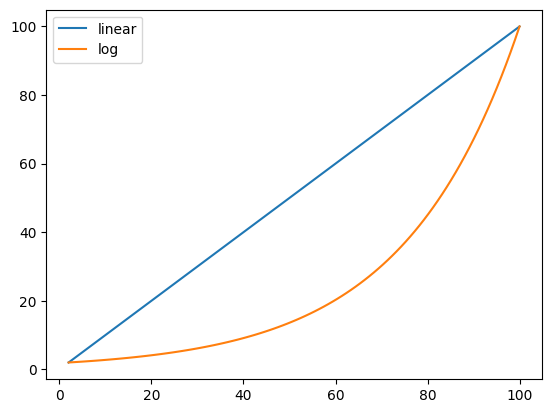

In [49]:
sns.lineplot(x=linear,y=linear, label="linear");
sns.lineplot(x=linear, y=log_space, label="log");

# **Logarithm properties: Multiplication and division**

- How multiplication and division are related to addition and substraction

$$ \text{Multiplication property}: log(a\times b) = log(a) + log(b) $$

$$ \text{Division property}: log\left(\frac{a}{b}\right) = log(a) - log(b) $$

$$ \text{exponential property}: log(a^b) = b\ log(a) $$

In [50]:
# Showing only the multiplicative property of logarithms, could do the same for others.

a = 3
b = 4

res1 = np.log(a*b)
res2 = np.log(a) * np.log(b)
res3 = np.log(a) + np.log(b)


#They are not the same
display(Math("\\log(%g\\times%g) = %g" %(a,b,res1)))
display(Math("\\log(%g)\\times\\log(%g) = %g" %(a,b,res2)))
display(Math("\\log(%g) + \\log(%g) = %g" %(a,b,res3)))

print("What i have just proven")

display(Math("\\log(%g)\\times\\log(%g) \\neq  \\log(%g\\times%g)" %(a,b,a,b)))
display(Math("\\log(%g\\times%g) =  \\log(%g) + \\log(%g)" %(a,b,a,b)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

What i have just proven


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Arithmetic and geometric sequences**

- Mathematical sequence: A ordered list of numbers.

$$\text{arithmetic sequence} \Rightarrow a_n = a_0 + d\left(n-1\right) $$

$$\text{geometric sequence} \Rightarrow g_n = g_0 \times  r^\left(n-1\right) $$

In [51]:
# parameters

a = 8   # starting num param
d = 3  #skipping parameters

max_n = 10 #max number of n.

ariseq = a + d*(np.arange(0,max_n))

print(ariseq)

geoseq = a

[ 8 11 14 17 20 23 26 29 32 35]


In [52]:
g = 2
r = 3

max_n = 10 #max number of n.

geoseq = g * r**(np.arange(0,max_n)) #  2*3^0 = 2 , 2*3^1 = 6..
print(geoseq)

[    2     6    18    54   162   486  1458  4374 13122 39366]


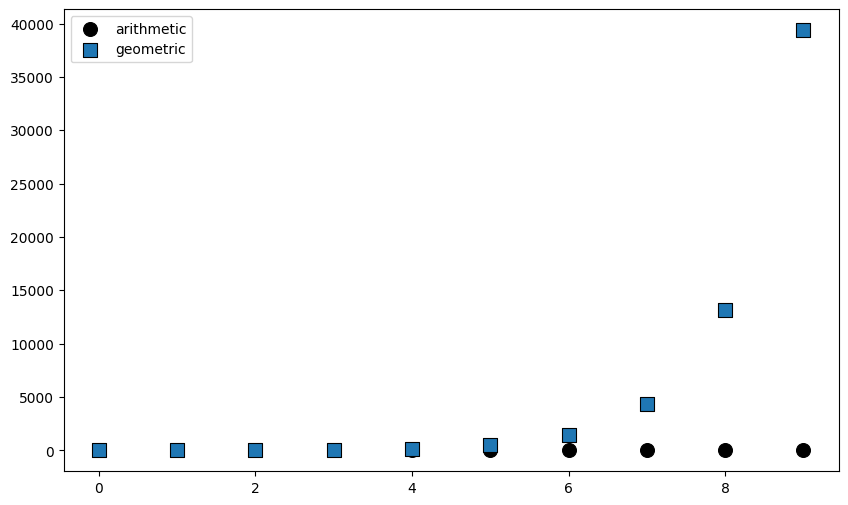

In [53]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x=np.arange(0,max_n), y=ariseq, label="arithmetic", s=100, edgecolor="black", color="black",**{"marker":"o"});
sns.scatterplot(x=np.arange(0,max_n), y=geoseq, label="geometric", s=100, edgecolor="black", **{"marker":"s"});

In [54]:
a = 8   # starting num param
d = 3  #skipping parameters

print(ariseq) 

[ 8 11 14 17 20 23 26 29 32 35]


In [55]:
for n, v in enumerate(ariseq):
    
    print(ariseq[n] == a + d*(n))
    
    

True
True
True
True
True
True
True
True
True
True


**Scientific notation and orders of magnitude**

0 order of magnitude = 10^0 = 1<br>
1 order of magnitude = 10^1 = 10<br>
2 order of magnitude = 10^2 = 100.. and so on.<br>


$$10021 : 1x10^4  ->  1e+04$$
$$2119 : 2x10^3  ->  2e+03$$
$$0.034: 3x10^-2  ->  3e-02$$


In [56]:
x = 4129576
x_ver = 4.129576 * 10**6

print(x==x_ver)

"{:,e}".format(x)

True


'4.129576e+06'

In [57]:
"{:,d}".format(x)

'4,129,576'

In [58]:
"%e" %x

'4.129576e+06'

In [59]:
"%.2e" %x

'4.13e+06'

In [60]:
x = 2222

x_scifi = "%.4e" %x
magnitude = int(x_scifi[-3:])

print(f"{x} is {magnitude} orders of magnitude, = {x_scifi[0:4]} x 10^{magnitude}")

2222 is 3 orders of magnitude, = 2.22 x 10^3


In [61]:
# list the number
num = 9999

# order of magnitude
orderOfMag = int(np.floor(np.log10(abs(num))))

# convert to scientific notation and get the characters before the period
numstr = '{:,e}'.format(num)
wheredot = numstr.find('.')
scinot = numstr[:wheredot]

display(Math( '%s\\text{ is }%s\\text{ orders of magnitude, }\\approx %s\\times10^{%g}' \
             %(num,orderOfMag,scinot,orderOfMag) ))

<IPython.core.display.Math object>

# **Maximum and Minimum of a function**

In [62]:
lst = [-4,5.5,1,2]

In [63]:
np.max(lst)

5.5

In [64]:
lst[np.argmax(lst)]

5.5

-0.7388185920927908 9


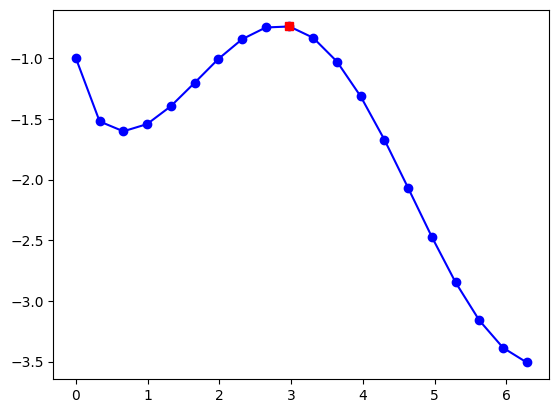

In [65]:
x = np.linspace(0,2*np.pi,20)
fx = -(np.cos(x) + np.sqrt(x))

fmax = np.max(fx)
fmaxidx = np.argmax(fx)

print(fmax,fmaxidx)

plt.plot(x,fx, "bo-");
plt.plot(x[fmaxidx], fmax,"rs");

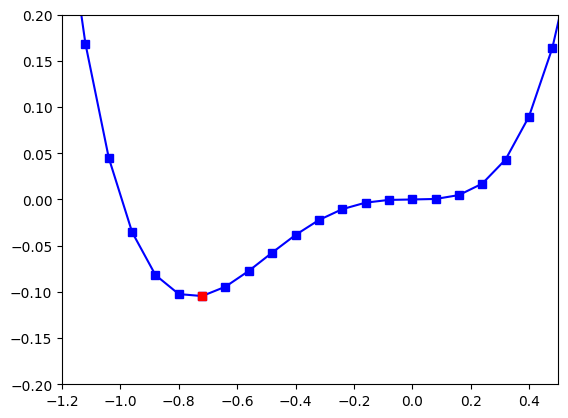

In [66]:
x = np.linspace(-2,2,51)

fx = x**3 + x**4

fminidx = np.argmin(fx)

plt.plot(x,fx,"bs-");
plt.xlim([-1.2,0.5])
plt.ylim([-0.2,0.2])
plt.plot(x[fminidx], np.min(fx), "rs")

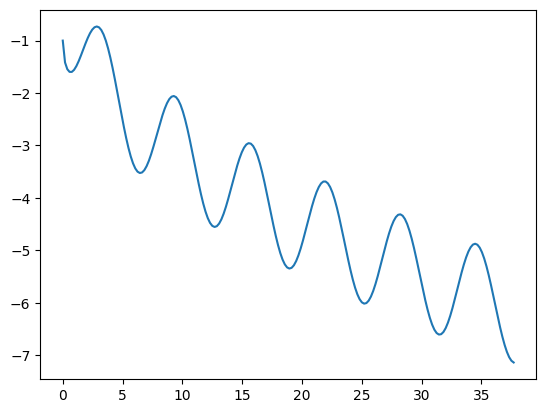

In [67]:
x = np.linspace(0,12*np.pi,200)

fx = - np.cos(x) - np.sqrt(x)

plt.plot(x,fx);

In [68]:
init_index = 0
number_of_peaks = 6 #6 because is the number of peaks   (6 * 2 * np.pi)
last = int(x.shape[0]/number_of_peaks) 
interval = int(x.shape[0]/number_of_peaks) 


maximums = np.empty(6)
idxmax = np.empty(6)

for n in range(number_of_peaks):

    maximums[n] = np.max(fx[init_index: last])
    idxmax[n] = np.argmax(fx[init_index: last]) + n*interval
    
    init_index += interval
    last += interval

idxmax = idxmax.astype("int")

In [69]:
idxmax

array([ 15,  49,  82, 116, 149, 182])

[ 16  52  88 123 158 194]


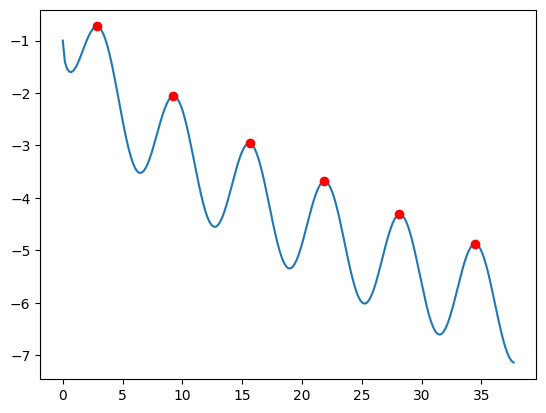

In [70]:
from scipy.signal import find_peaks


x = np.linspace(0,12*np.pi,213)

fx = - np.cos(x) - np.sqrt(x)

peaks = find_peaks(fx)[0]
print(peaks)

plt.plot(x,fx);
plt.plot(x[peaks], fx[peaks], "ro");
#plt.plot(x[idxmax], maximums, "ro")

In [71]:
peaks[0]

16

# **Even and odd functions**

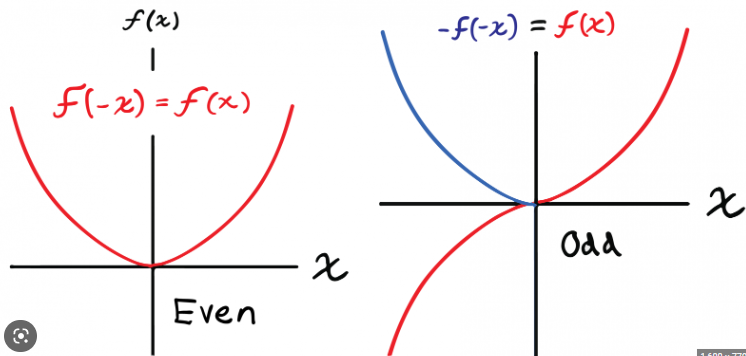

F(x) is even if F(-x) = F(x)<br>
F(x) is odd if F(-x) = -F(x)<br>

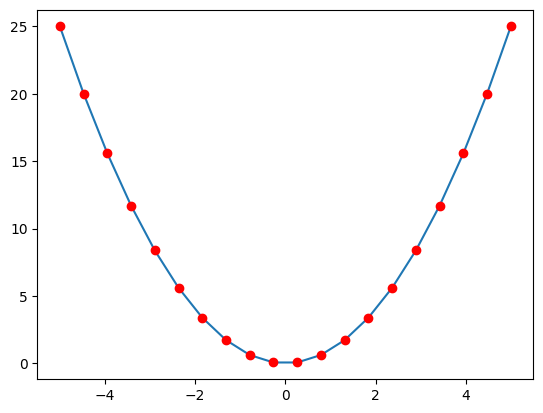

In [72]:
x = np.linspace(-5,5,20)

fEven = x**2
fEvenNeg = (-x)**2

plt.plot(x,fEven);
plt.plot(x,fEvenNeg,"ro");

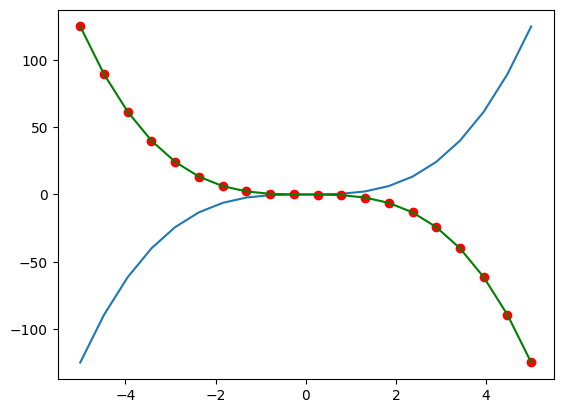

In [73]:
fOdd = x**3
fOddNeg = (-x)**3
fNegOdd = -fOdd

plt.plot(x,fOdd);
plt.plot(x,fOddNeg,"ro");
plt.plot(x,fOddNeg,"g");


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


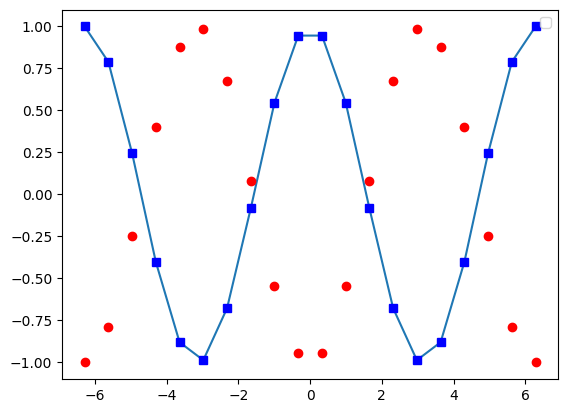

In [74]:
#cosine is even

x = np.linspace(-2*np.pi,2*np.pi,20)

fxcos = np.cos(x)
fxoddcos = -np.cos(x)
fxevencos = np.cos(-x)

plt.plot(x,fxcos);
plt.plot(x,fxoddcos,"ro")
plt.plot(x,fxevencos,"bs")
plt.legend();

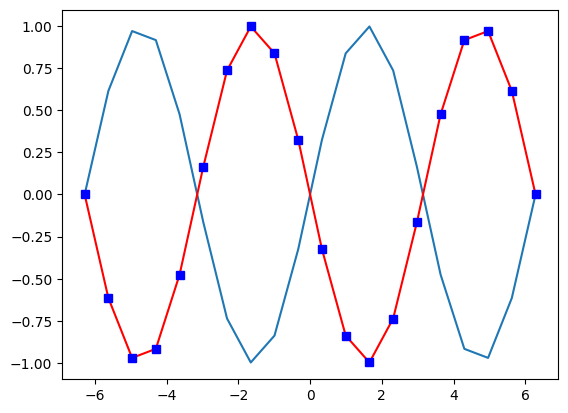

In [75]:
#sin is odd

fxsin = np.sin(x)
fxoddsin = -np.sin(x)
fxevensin = np.sin(-x)

plt.plot(x,fxsin);
plt.plot(x, fxoddsin,"r", )
plt.plot(x, fxevensin,"bs");